In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
Airlines= pd.read_csv("Airlines+Data.csv")
Airlines

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


<AxesSubplot:>

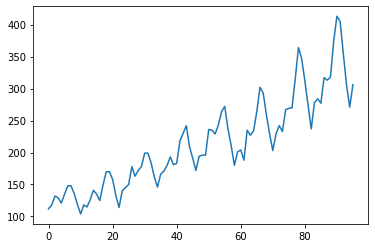

In [56]:
Airlines.Passengers.plot()

In [57]:
Airlines["Date"] = pd.to_datetime(Airlines.Month,format="%b-%y")

Airlines["month"] = Airlines.Date.dt.strftime("%b") # month extraction
Airlines["year"] = Airlines.Date.dt.strftime("%Y") # year extraction

<AxesSubplot:xlabel='month', ylabel='year'>

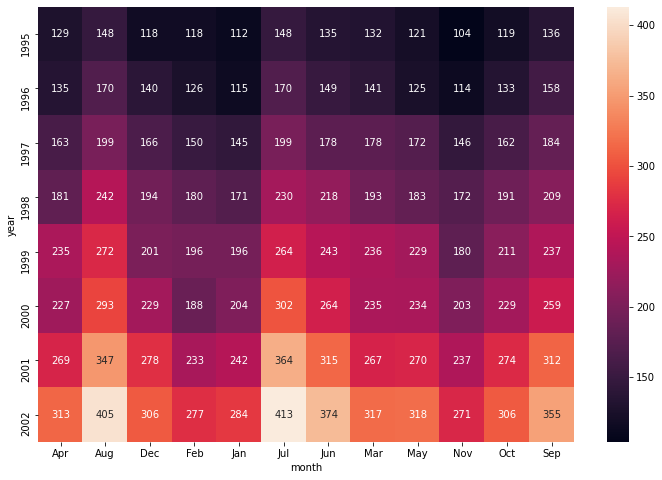

In [58]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")


<AxesSubplot:xlabel='year', ylabel='Passengers'>

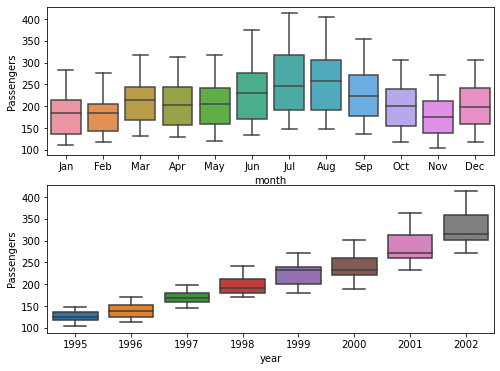

In [59]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)


<AxesSubplot:xlabel='year', ylabel='Passengers'>

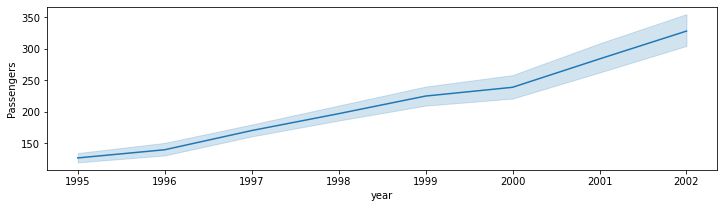

In [60]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)

In [61]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
import numpy as np
p = Airlines["Month"][0]
p[0:3]
Airlines['months']= 0

for i in range(96):
    p = Airlines["Month"][i]
    Airlines['months'][i]= p[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(Airlines['months']))
Airlines1 = pd.concat([Airlines,month_dummies],axis = 1)
Airlines1


<ipython-input-61-07c9567345b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airlines['months'][i]= p[0:3]
C:\Users\cricl\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Month,Passengers,Date,month,year,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,1995-01-01,Jan,1995,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,1995-02-01,Feb,1995,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,1995-03-01,Mar,1995,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,1995-04-01,Apr,1995,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,1995-05-01,May,1995,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,2002-08-01,Aug,2002,Aug,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,2002-09-01,Sep,2002,Sep,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,2002-10-01,Oct,2002,Oct,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,2002-11-01,Nov,2002,Nov,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

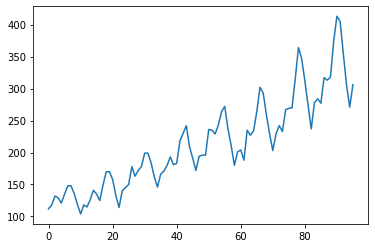

In [62]:
Airlines1["t"] = np.arange(1,97)

Airlines1["t_squared"] = Airlines1["t"]*Airlines1["t"]
Airlines1.columns
Airlines1["log_Passengers"] = np.log(Airlines1["Passengers"])
Airlines1.rename(columns={"Passengers": 'Passengers'}, inplace=True)
Airlines1.Passengers.plot()

In [63]:
Train = Airlines1.head(84)
Test = Airlines1.tail(12)

In [64]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480271

In [65]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.057361103156246

In [66]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.051888979331565

In [67]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea


132.8197848142182

In [68]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612085107

In [69]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.0632020470867

In [70]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

10.519172544324203

In [71]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


In [72]:
predict_data = pd.read_csv("Predict_new.csv")

In [73]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [74]:
#Build the model on entire data set
final= smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Airlines1).fit()
pred_new  = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new

0     6.561648
1     6.551930
2     6.670291
3     6.777555
4     6.777930
5     6.670767
6     6.543287
7     6.411553
8     6.550254
9     6.571636
10    6.587230
11    6.731594
dtype: float64

In [75]:
predict_data["forecasted_Passengers"] = pd.Series(pred_new)

In [76]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,forecasted_Passengers
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,6.561648
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,6.551930
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,6.670291
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,6.777555
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,6.777930
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,6.670767
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,6.543287
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,6.411553
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,6.550254
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,6.571636
